Estatística e Modelos Probabilísticos 
====================
###### COE241 - 2017.2  
###### Lucas Vieira Gama - DRE 113080612  

Projeto de Curso
-----
Estudo probabilístico de um conjunto de dados.

## Introdução
Devido a atual relevância do mercado de crypto moedas no cenário mundial, foi escolhido um conjunto de dados histórios de diferentes modeas, disponível no site Kaggle (https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory). Existem diferentes moedas e tokens disponíveis no mercado, e o objetivo deste trabalho é verificar se é possível encontrar algum padrão probabilístico que auxilie avaliação de preço e valor, e na consequente redução de riscos no investimento.

Para a execução dos experimentos e realização das análises, foi utilizada a linguagem de desenvolvimento Python, com o auxílio das ferramentas Jupyter Notebook, Numpy, Pandas, Matplotlib e Scipy.

### Dados
Os dados estão em diferentes datasets, que incluem as seguintes modeas:
* Bitcoin
* Ethereum
* Ripple
* Bitcoin cash
* Bitconnect
* Dash
* Ethereum Classic
* Iota
* Litecoin
* Monero
* Nem
* Neo
* Numeraire
* Stratis
* Waves

Para cada dataset, os dados estão organizados em série temporal diárias com as seguintes informações diárias:
* Date : data da observação
* Open : Preço de abertura no dia
* High : Maior valor atingido no dia
* Low : Menor valor atingido no dia
* Close : Preço de fechamento no dia
* Volume : Volume de transações no dia
* Market Cap : Total de capitalização no mercado USD

### Tratamento dos dados
Para trabalhar estatisticamente, havia o problema da variação do valor, que dependia do valor no dia anterior. Para simplificar e aproximar nosso modelo com as distribuições probabilísticas discutidas no curso, foi extraído a variação relativa diária, isto é, a diferença entre o preço de abertura e fechamento de cada dia, em porcentagem.

Para fins estatísticos, necessitamos de dados suficientemente grandes. Entretanto, algumas destas moedas possuem poucos meses de existência. Portanto, consideramos apenas as moedas criadas no máximo 1 ano atrás.

In [18]:
import numpy as np # manipulação de matrizes
import pandas as pd # Manipulação de data/sets
import matplotlib.pyplot as plt # Para plotagem
import scipy.stats as stats # Normalizações, cálculos de densidade de probabilidade, etc
import math

In [19]:
## Lendo o dataset e processando os dados
data = {}
data['BTC'] = pd.read_csv("data/bitcoin_price.csv")
data['ETH'] = pd.read_csv("data/ethereum_price.csv")
data['DSH'] = pd.read_csv("data/dash_price.csv")
data['LTC'] = pd.read_csv("data/litecoin_price.csv")
data['XMR'] = pd.read_csv("data/monero_price.csv")
data['NEM'] = pd.read_csv("data/nem_price.csv")
data['NEO'] = pd.read_csv("data/neo_price.csv")
data['OMG'] = pd.read_csv("data/omisego_price.csv")
data['XRP'] = pd.read_csv("data/ripple_price.csv")
data['STRAT'] = pd.read_csv("data/stratis_price.csv")
data['WAVES'] = pd.read_csv("data/waves_price.csv")

def getRelativeChange(ticker):
    return (ticker['Close'] - ticker['Open']) / ticker['Open']

variation = {}
for coin in data.keys():
    variation[coin] = data[coin].apply(getRelativeChange, axis=1)

### Histograma Normalizado
Com a mudança relativa no preço diário, foi possível traçar um histograma, para cada moeda. Podemos observar que ele possui uma distribuição selhemante a Distribuição Gaussiana / Normal.

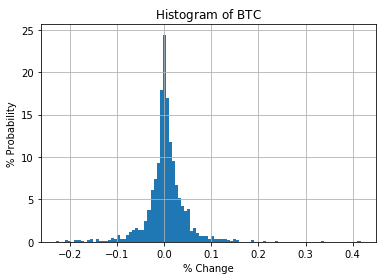

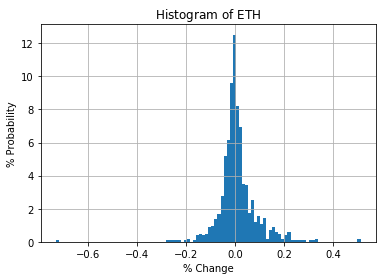

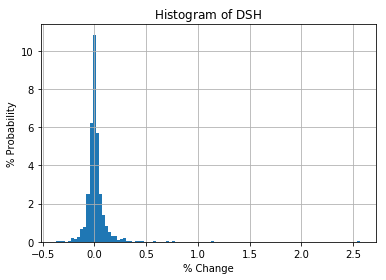

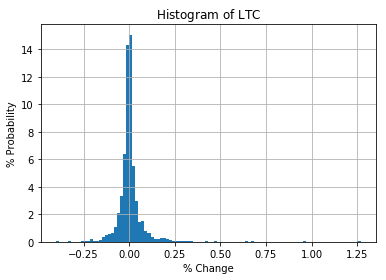

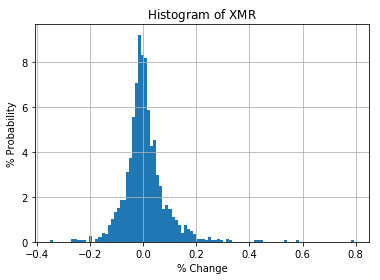

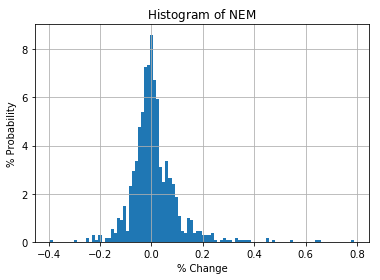

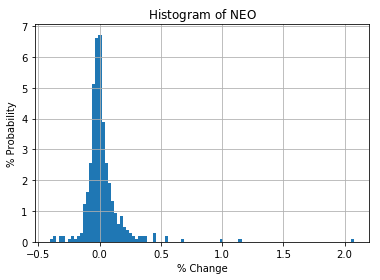

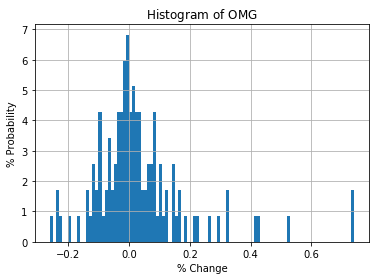

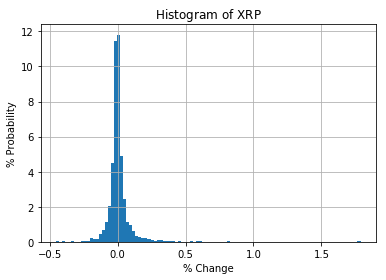

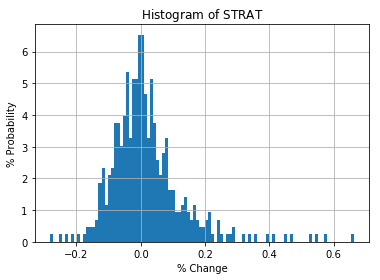

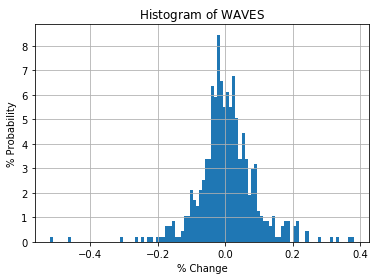

In [20]:
for coin in variation.keys():
    plt.hist(variation[coin], 100, normed=1)
    plt.xlabel('% Change')
    plt.ylabel('% Probability')
    plt.title(r'$\mathrm{Histogram\ of\ %s}$' % coin)
    plt.grid(True)
    plt.show()

### Média, Variância e Desvio Padrão Amostral
Com base no que foi descoberto, tentamos obter os parâmetros para análise e posteriormente plotagem da distribuição normal.

In [21]:
totalVariation  = {}
mean            = {}
variance        = {}
std             = {}
for coin in variation.keys():
    print(coin)
    totalVariation[coin] = variation[coin].sum()
    mean[coin] = totalVariation[coin]/len(variation[coin])
    print("{0:15} {1}".format('Média', mean[coin]))

    # unbiased variance
    variance[coin] = variation[coin].var()
    print("{0:15} {1}".format('Variância', variance[coin]))

    std[coin] = (variance[coin])**(1/2)
    print("{0:15} {1}".format('Desvio Padrão', std[coin]))

BTC
Média           0.003161511584931454
Variância       0.0018402317540975376
Desvio Padrão   0.042897922491625835
ETH
Média           0.008714680615712884
Variância       0.006415865586213998
Desvio Padrão   0.08009909853558901
DSH
Média           0.009527565949561627
Variância       0.012205506711108614
Desvio Padrão   0.11047853506952658
LTC
Média           0.0036875339385582695
Variância       0.005674486411469418
Desvio Padrão   0.07532918698266575
XMR
Média           0.005966371273652904
Variância       0.006625684494933903
Desvio Padrão   0.08139830769084762
NEM
Média           0.010243966432478458
Variância       0.008917790136160238
Desvio Padrão   0.0944340517830313
NEO
Média           0.02195991380265789
Variância       0.02910817174655072
Desvio Padrão   0.1706111712243683
OMG
Média           0.03235956135419331
Variância       0.02524523763039308
Desvio Padrão   0.15888749991863135
XRP
Média           0.005205752474566383
Variância       0.007612493061416844
Desvio Padrão

Podemos observar, entretanto, que estes resultados não são significativos. Para o Bitcoin, por exemplo, o desvio padrão é 13x o valor da média.

### Distribuição Normal
Traçamos então o gráfico para as PDFs de cada moeda.

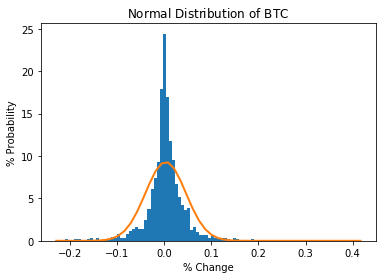

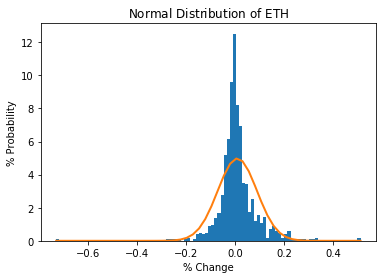

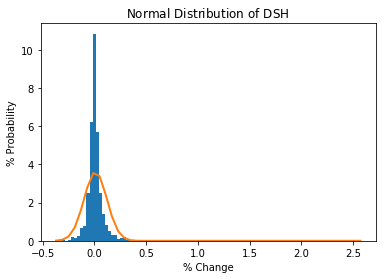

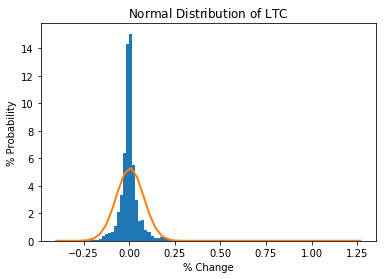

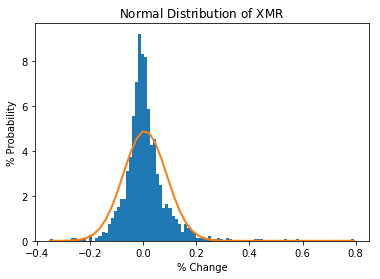

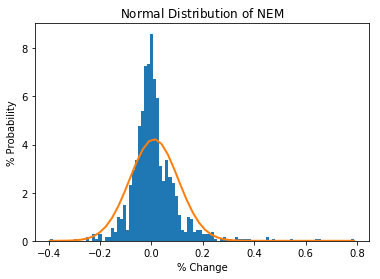

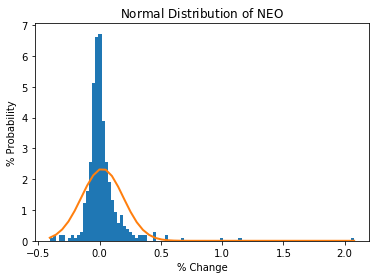

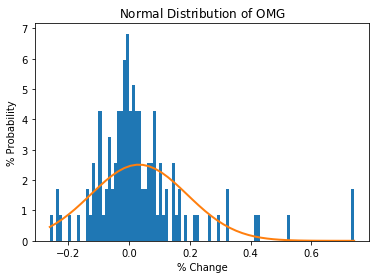

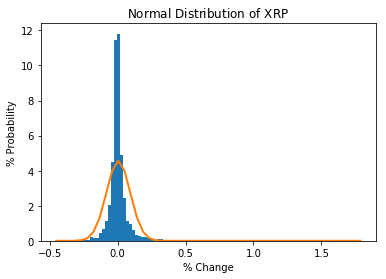

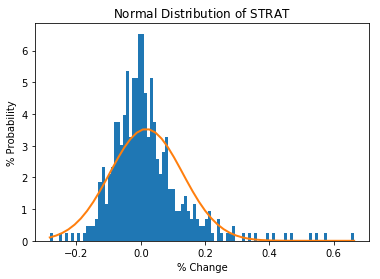

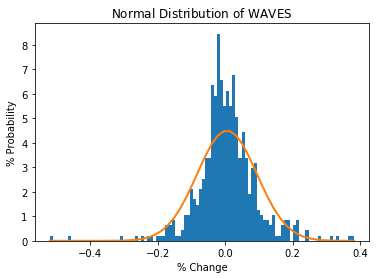

In [22]:
for coin in variation.keys():
    # plots histogram
    plt.hist(variation[coin], 100, normed=1)
    plt.xlabel('% Change')
    plt.ylabel('% Probability')
    plt.title(r'$\mathrm{Normal\ Distribution\ of\ %s}$' % coin)
    
    # makes distribution
    rv = stats.norm(mean[coin], std[coin])
    
    # plots r.v.
    x = np.linspace(min(variation[coin]), max(variation[coin])) 
    plt.plot(x, rv.pdf(x), lw=2)
    plt.show()

Observamos visualmente que a Normal não aproxima bem o gráfico, que possui um pico mais acentuado em torno da média. Para verificar esta 

### Goodness of Fit - KS TTeste
Para avalior se os dados podem ser aproximados pelas distribuições, usamos o teste Goodness of Fit Kolmogorov-Smirnov para variáveis contínuas, e buscamos um erro $ \alpha $ de 5%.

In [23]:
for coin in variation.keys():
    print('Coin %s' % coin)
    
    # statistic for alpha = 5%
    n = len(variation[coin])
    print('Statistic should be %f' % (1.35810/math.sqrt(n)))
    
    print(stats.kstest(variation[coin], 'norm', [mean[coin], std[coin]]))
    print('\n')

Coin BTC
Statistic should be 0.033384
KstestResult(statistic=0.12437998719717652, pvalue=0.0)


Coin ETH
Statistic should be 0.047312
KstestResult(statistic=0.14265720803173787, pvalue=4.2188474935755949e-15)


Coin DSH
Statistic should be 0.036786
KstestResult(statistic=0.2000141116211378, pvalue=0.0)


Coin LTC
Statistic should be 0.033384
KstestResult(statistic=0.20245303010868865, pvalue=0.0)


Coin XMR
Statistic should be 0.038169
KstestResult(statistic=0.11121792093935279, pvalue=4.2854608750531042e-14)


Coin NEM
Statistic should be 0.044016
KstestResult(statistic=0.13393801942625916, pvalue=2.4424906541753444e-15)


Coin NEO
Statistic should be 0.065878
KstestResult(statistic=0.20448764236734251, pvalue=4.4408920985006262e-16)


Coin OMG
Statistic should be 0.125556
KstestResult(statistic=0.1528728897071836, pvalue=0.0074744729736619941)


Coin XRP
Statistic should be 0.034418
KstestResult(statistic=0.1973289157733098, pvalue=0.0)


Coin STRAT
Statistic should be 0.063809
Kstes

Como podemos observar, a estatística do teste com significância de 5% de  rejeitou as distribuições normais para todas as moedas. Necessitamos, portanto, de outra distribuição que melhor explique os dados.

### Distribuição T-Student
Com base na referência 1, que já estudou as variações das moedas em períodos anteriores, escolhemos a distribuição T-Student, por ter maior grau de liberdade e conseguir aproximar melhor o evento estudado, com uma cauda mais pesada.

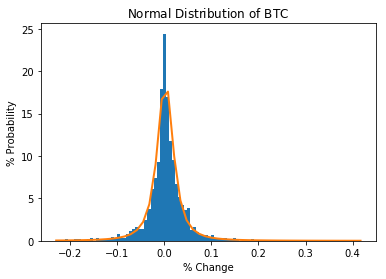

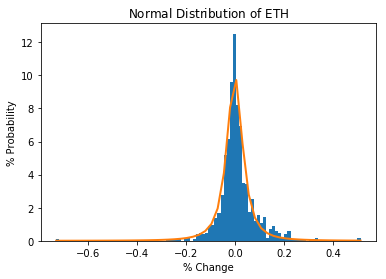

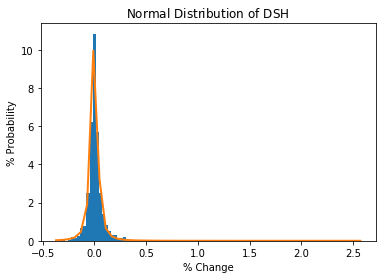

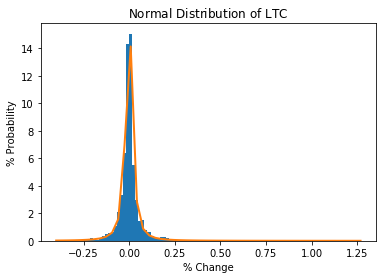

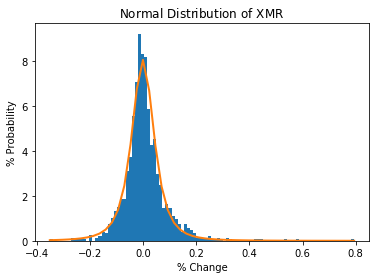

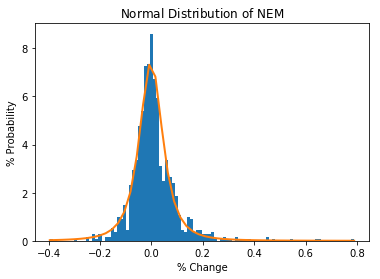

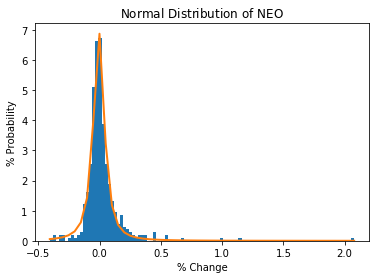

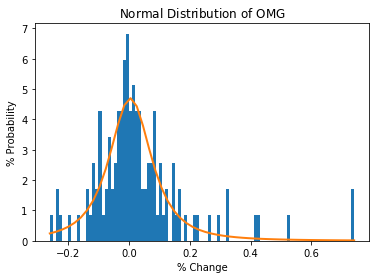

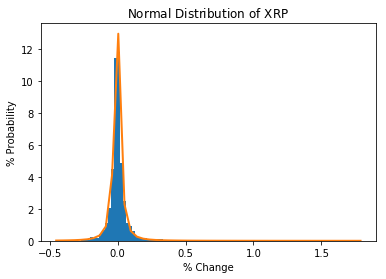

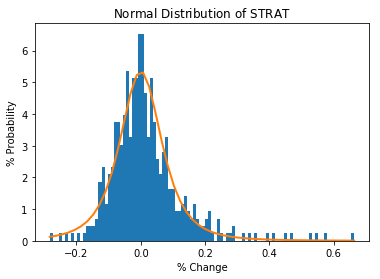

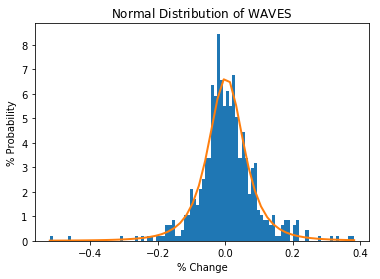

In [24]:
t_rv = {}
for coin in variation.keys():
    # plots histogram
    plt.hist(variation[coin], 100, normed=1)
    plt.xlabel('% Change')
    plt.ylabel('% Probability')
    plt.title(r'$\mathrm{Normal\ Distribution\ of\ %s}$' % coin)
    
    # estimates parameters with MLE
    df, location, scale = stats.t.fit(variation[coin])
    t_rv[coin] = stats.t(df, location, scale)
    
    # plots r.v.
    x = np.linspace(min(variation[coin]), max(variation[coin])) 
    plt.plot(x, t_rv[coin].pdf(x), lw=2)
    plt.show()

### Goodness of Fit - KS TTeste
Para avalior se os dados podem ser aproximados pelas distribuições, usamos o teste Goodness of Fit Kolmogorov-Smirnov para variáveis contínuas, e buscamos um erro $ \alpha $ de 5%.

In [25]:
for coin in variation.keys():
    print('Coin %s' % coin)
    
    # statistic for alpha = 5%
    n = len(variation[coin])
    print('Statistic should be %f' % (1.35810/math.sqrt(n)))
    
    print(stats.kstest(variation[coin], t_rv[coin].cdf))
    print('\n')

Coin BTC
Statistic should be 0.033384
KstestResult(statistic=0.036942886229085703, pvalue=0.021286851212688251)


Coin ETH
Statistic should be 0.047312
KstestResult(statistic=0.056999125121492744, pvalue=0.0090816498832502202)


Coin DSH
Statistic should be 0.036786
KstestResult(statistic=0.035708692793363861, pvalue=0.060383672906328734)


Coin LTC
Statistic should be 0.033384
KstestResult(statistic=0.028959060250483004, pvalue=0.12219182153875163)


Coin XMR
Statistic should be 0.038169
KstestResult(statistic=0.033298898295299972, pvalue=0.11803423736870289)


Coin NEM
Statistic should be 0.044016
KstestResult(statistic=0.040663856114492192, pvalue=0.083513012050154822)


Coin NEO
Statistic should be 0.065878
KstestResult(statistic=0.053115916401157204, pvalue=0.17540804536305132)


Coin OMG
Statistic should be 0.125556
KstestResult(statistic=0.051199490944666276, pvalue=0.91894204316197314)


Coin XRP
Statistic should be 0.034418
KstestResult(statistic=0.033020787033658294, pvalue=0

Como podemos observar, as seguintes moedas foram aceitas como distribuidas por T Student:
* DSH
* LTC
* XMR
* NEM
* NEO
* OMG
* XRP
* STRAT
* WAVES

Com destaque para OMG e Waves, que tiveram os melhores resultados

### Q-Q Plot
Traçamos finalmente o gráfico Quantile Quantile Plot, para analisar visualmente a aproximação dos dados pela função de distribuição T-Student.

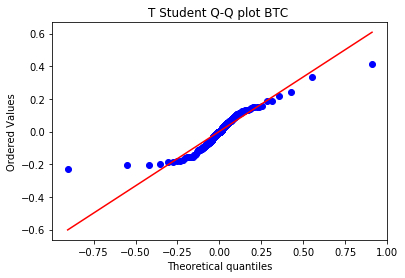

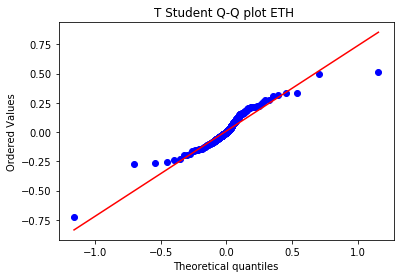

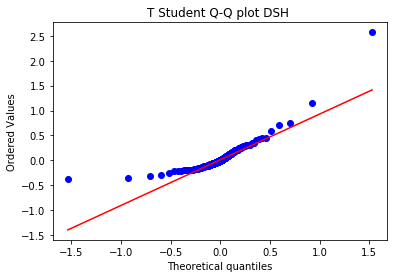

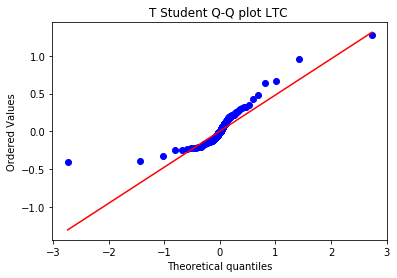

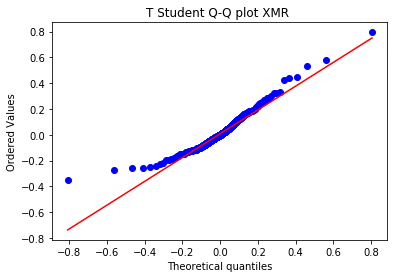

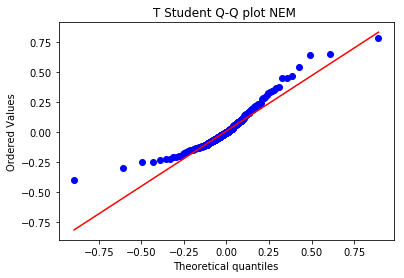

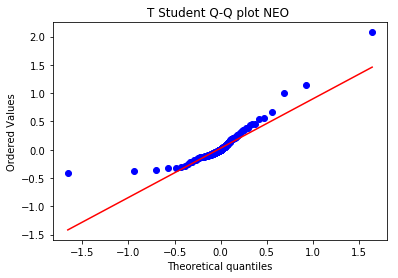

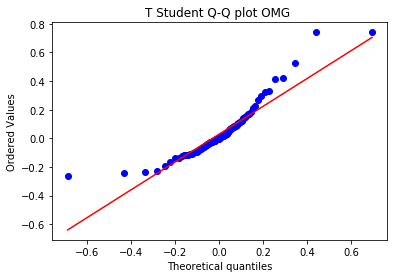

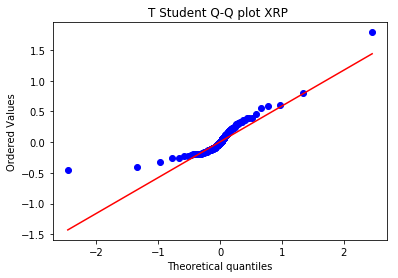

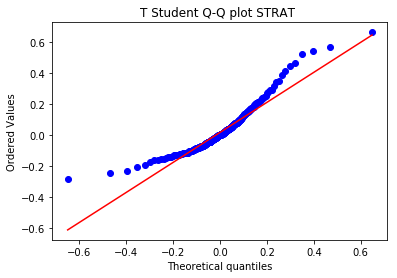

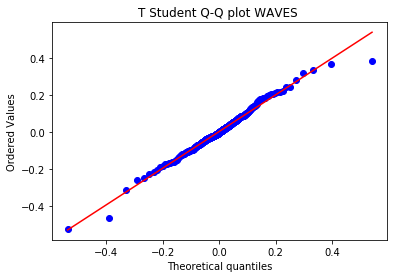

In [26]:
for coin in variation.keys():
    stats.probplot(variation[coin], dist=t_rv[coin], plot=plt)
    plt.title("T Student Q-Q plot %s " % coin)
    plt.show()

### Conclusões
O resultado nos mostra que algumas moedas se "comportam" muito bem como esperado na distribuição da literatura, enquanto outras de forma mais inexperada. Podemos estimar algumas riscos, por exemplo, calcular a probabilidade de termos uma variação relativa menor que x, através da PDF.  
Entretanto, ressaltamos que os testes foram feitos com os valores de abertura e fechamento do dia, que podem diferir consideravelmente dos máximos e mínimos. Devido as limitações do dataset, não foi possível testar para intervalos menores, como 240, 60, 30 minutos, que são relevantes dado a grande variação intraday apresentada pelas moedas.
Ainda, em virtude as limitações de escopo e tempo, outras variáveis disponíveis não foram exploradas. Dentre elas, destacamos o volume, que intuitivamente pode trazer muita informação sobre as variações do dia.

### Referências
1 Jörg Osterrieder. The Statistics of Bitcoin and Cryptocurrencies. Novembro, 2017.  
  
2 Stephen Chan, Jeffrey Chu, Saralees Nadarajah, Joerg Osterrieder. A Statistical Analysis of Cryptocurrencies. Maio 2017.
### Anexo
O código deste trabalho está disponível em https://github.com/lucasvg/crypoCurrencies-estModProb-COE241-UFRJ